In [1]:
import pandas as pd

# Load both Excel sheets into pandas DataFrames
input_data = pd.read_excel('D:\Power bi\Sales Trend Analysis\Sales-Dashboard-practice-file.xlsx', sheet_name='Input Data')
master_data = pd.read_excel('D:\Power bi\Sales Trend Analysis\Sales-Dashboard-practice-file.xlsx', sheet_name='Master Data')

# Merge the dataframes based on 'Product ID' using a left join
merged_data = input_data.merge(master_data, on='PRODUCT ID', how='left')

# Repeat rows from the master_data DataFrame to match the length of input_data
repeated_master_data = master_data.loc[master_data.index.repeat(len(input_data) // len(master_data))].reset_index(drop=True)
remaining_rows = len(input_data) % len(master_data)
repeated_master_data = pd.concat([repeated_master_data, master_data.head(remaining_rows)], ignore_index=True)

# Combine the repeated master data with the input data
merged_data_with_repeats = pd.concat([input_data.reset_index(drop=True), repeated_master_data], axis=1)

# Export the merged data to a new Excel file
merged_data_with_repeats.to_excel('D:\Power bi\Sales Trend Analysis\merged_data_with_repeats.xlsx', index=False)



In [2]:
import pandas as pd

# Load both Excel sheets into pandas DataFrames
input_data = pd.read_excel('D:\Power bi\Sales Trend Analysis\Sales-Dashboard-practice-file.xlsx', sheet_name='Input Data')
master_data = pd.read_excel('D:\Power bi\Sales Trend Analysis\Sales-Dashboard-practice-file.xlsx', sheet_name='Master Data')

# Merge the dataframes based on 'Product ID' using a left join
merged_data = input_data.merge(master_data, on='PRODUCT ID', how='left')

# Export the merged data to a new Excel file
merged_data.to_excel('D:\Power bi\Sales Trend Analysis\merged_data.xlsx', index=False)


# SALES TREND ANALYSIS

# 1.DATA CLEANING

In [3]:
import pandas as pd

# Load your Excel data into a DataFrame
file_path = 'D:\Power bi\Sales Trend Analysis\merged_data.xlsx'
df = pd.read_excel(file_path)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Check data types and fix anomalies
print("Data Types:\n", df.dtypes)

# Data type conversions if needed
# Example: Convert 'Date' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])

# Ensure consistency in data formats and columns
# Example: Renaming columns for clarity
df.rename(columns={'BUYING PRIZE': 'BUYING PRICE'}, inplace=True)


Missing Values:
 DATE             0
PRODUCT ID       0
QUANTITY         0
SALE TYPE        0
PAYMENT MODE     0
DISCOUNT %       0
PRODUCT          0
CATEGORY         0
UOM              0
BUYING PRIZE     0
SELLING PRICE    0
dtype: int64
Data Types:
 DATE             datetime64[ns]
PRODUCT ID               object
QUANTITY                  int64
SALE TYPE                object
PAYMENT MODE             object
DISCOUNT %                int64
PRODUCT                  object
CATEGORY                 object
UOM                      object
BUYING PRIZE              int64
SELLING PRICE           float64
dtype: object


# 2. UNDERSTANDING THE DATA STRUCTURE

In [4]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:\n", df.head())

# Summary statistics of numerical columns
print("Summary Statistics:\n", df.describe())

# Check unique values and their counts in categorical columns
print("Unique values in 'CATEGORY' column:\n", df['CATEGORY'].value_counts())


First few rows of the DataFrame:
         DATE PRODUCT ID  QUANTITY     SALE TYPE PAYMENT MODE  DISCOUNT %  \
0 2021-01-01      P0024         9    Wholesaler       Online           0   
1 2021-01-02      P0038        15        Online         Cash           0   
2 2021-01-02      P0013         6  Direct Sales         Cash           0   
3 2021-01-03      P0004         5  Direct Sales       Online           0   
4 2021-01-04      P0035        12        Online       Online           0   

     PRODUCT       CATEGORY  UOM  BUYING PRICE  SELLING PRICE  
0  Product24           Dior   Ft           144         156.96  
1  Product38      Valentino   Kg            72          79.92  
2  Product13   Calvin klein   Kg           112         122.08  
3  Product04         Celine   Lt            44          48.84  
4  Product35  louis Vuitton  No.             5           6.70  
Summary Statistics:
          QUANTITY  DISCOUNT %  BUYING PRICE  SELLING PRICE
count  527.000000       527.0    527.000000  

In [5]:
import pandas as pd

# Check the column names in your DataFrame
print(df.columns)


Index(['DATE', 'PRODUCT ID', 'QUANTITY', 'SALE TYPE', 'PAYMENT MODE',
       'DISCOUNT %', 'PRODUCT', 'CATEGORY', 'UOM', 'BUYING PRICE',
       'SELLING PRICE'],
      dtype='object')


In [6]:
import pandas as pd

# Display the DataFrame information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 0 to 526
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           527 non-null    datetime64[ns]
 1   PRODUCT ID     527 non-null    object        
 2   QUANTITY       527 non-null    int64         
 3   SALE TYPE      527 non-null    object        
 4   PAYMENT MODE   527 non-null    object        
 5   DISCOUNT %     527 non-null    int64         
 6   PRODUCT        527 non-null    object        
 7   CATEGORY       527 non-null    object        
 8   UOM            527 non-null    object        
 9   BUYING PRICE   527 non-null    int64         
 10  SELLING PRICE  527 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 49.4+ KB
None


In [10]:
duplicates = df[df.duplicated(subset='DATE', keep=False)]
print(duplicates)


Empty DataFrame
Columns: [DATE, DATE, DATE, DATE, PRODUCT ID, QUANTITY, SALE TYPE, PAYMENT MODE, DISCOUNT %, PRODUCT, CATEGORY, UOM, BUYING PRICE, SELLING PRICE]
Index: []


In [12]:
import pandas as pd

# Assuming your DataFrame is already prepared up to this point
# Resetting the index to turn the DatetimeIndex into a column
df.reset_index(inplace=True)

# Renaming the index column to 'DATE'
df.rename(columns={'index': 'DATE'}, inplace=True)

# Converting 'DATE' column to datetime format
try:
    df['DATE'] = pd.to_datetime(df['DATE'])
    print(df.info())
    print(df.head())
except ValueError as e:
    print("ValueError:", e)


ValueError: cannot assemble with duplicate keys


In [13]:
from statsmodels.tsa.stattools import adfuller
adftest=adfuller(df['SELLING PRICE'],autolag='AIC')

In [14]:
adftest

(-23.10302556127874,
 0.0,
 0,
 526,
 {'1%': -3.442843345332837,
  '5%': -2.867050445147657,
  '10%': -2.5697048674984457},
 5504.231783551433)

In [15]:
stats= pd.Series(adftest[0:4],index=['Test Statistics','p-value','#lags used','number of observation used'])
stats

Test Statistics               -23.103026
p-value                         0.000000
#lags used                      0.000000
number of observation used    526.000000
dtype: float64

# Rolling Statistics

In [16]:
df['rollMean'] = df['SELLING PRICE'].rolling(window=7).mean()
df['rollStd'] = df['SELLING PRICE'].rolling(window=7).std()


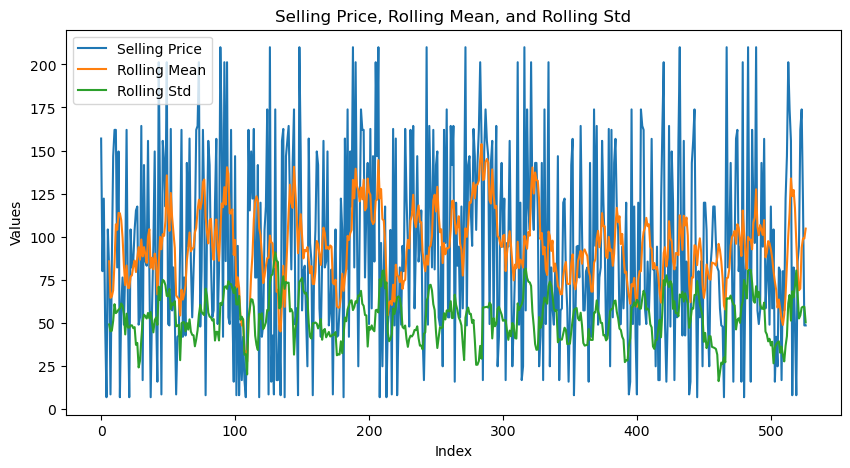

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['SELLING PRICE'], label='Selling Price')
plt.plot(df.index, df['rollMean'], label='Rolling Mean')
plt.plot(df.index, df['rollStd'], label='Rolling Std')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Selling Price, Rolling Mean, and Rolling Std')
plt.legend()
plt.show()


# 3.TIME SERIES TRANSFORMATION

In [18]:
df.set_index('DATE', inplace=True)
df.sort_index(inplace=True)
time_series_data = df['SELLING PRICE']

# 2.Descriptive Statistical Analysis

# i)Group data by Product Category

In [19]:
grouped_data=merged_data.groupby('CATEGORY')['SELLING PRICE']

# ii)Calculate Summary Statistics

In [20]:
# Calculate mean, median, mode, and standard deviation for each product category
summary_statistics = grouped_data.agg(['mean', 'median', lambda x: x.mode().values[0], 'std']).reset_index()
summary_statistics.columns = ['Product Category', 'Mean', 'Median', 'Mode', 'Standard Deviation']


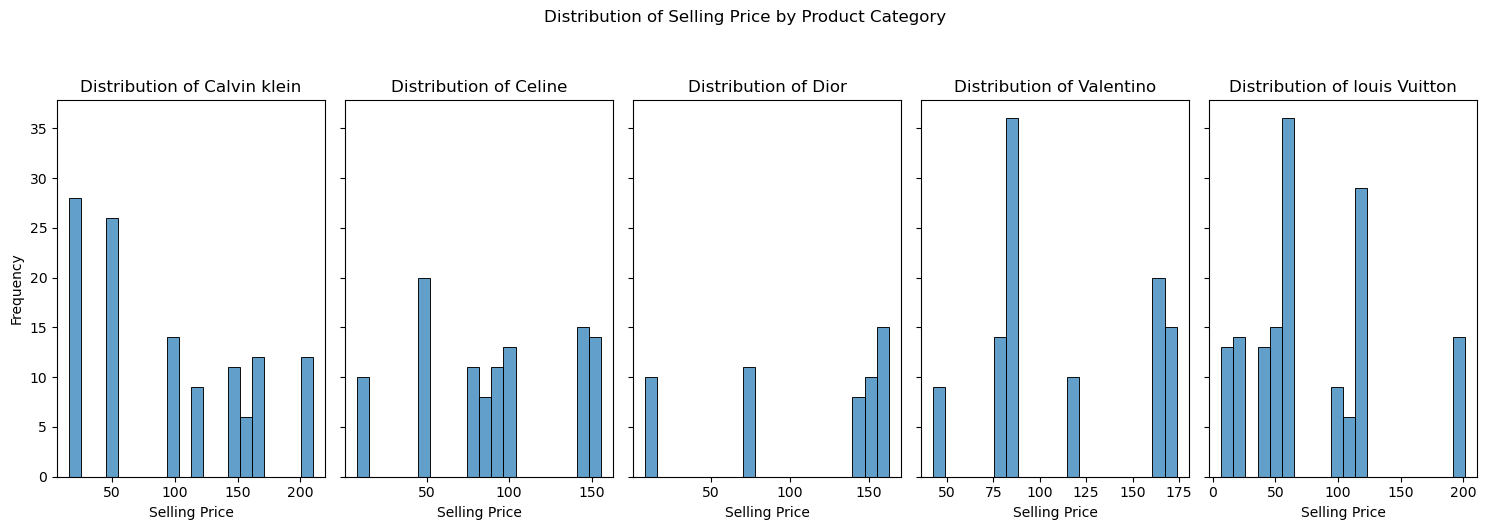

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each product category
fig, axes = plt.subplots(nrows=1, ncols=len(grouped_data), figsize=(15, 5), sharey=True)

# Plot histograms for each category separately
for i, (category, values) in enumerate(grouped_data):
    sns.histplot(values, bins=20, alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of {category}')
    axes[i].set_xlabel('Selling Price')
    axes[i].set_ylabel('Frequency')

plt.suptitle('Distribution of Selling Price by Product Category', y=1.05)
plt.tight_layout()
plt.show()


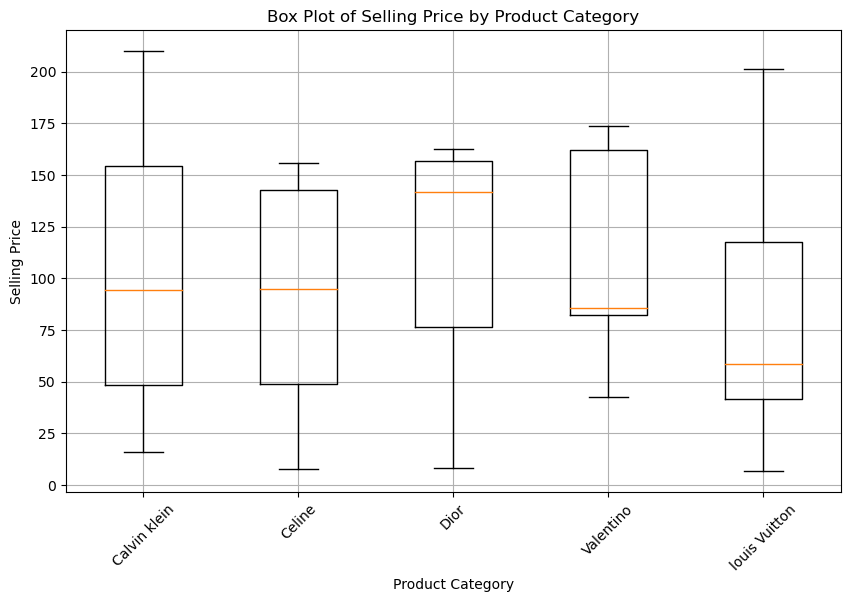

In [22]:
# Create box plots for each product category
plt.figure(figsize=(10, 6))
plt.boxplot([values.values for _, values in grouped_data], labels=grouped_data.groups.keys())
plt.xlabel('Product Category')
plt.ylabel('Selling Price')
plt.title('Box Plot of Selling Price by Product Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# AUTOCORRELATION ANALYSIS

In [31]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose  # Importing seasonal_decompose

# Assuming time_series_data is defined and loaded with your time series data

# Perform decomposition
result = seasonal_decompose(time_series_data, model='multiplicative', period=2)

# Create Plotly figure
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=('Observed', 'Trend', 'Seasonal', 'Residuals'))

# Add traces for each component with hover text including values
fig.add_trace(go.Scatter(x=result.observed.index, y=result.observed, mode='lines',
                         name='Observed', hovertext=result.observed, hoverinfo='text'), row=1, col=1)
fig.add_trace(go.Scatter(x=result.trend.index, y=result.trend, mode='lines',
                         name='Trend', hovertext=result.trend, hoverinfo='text'), row=2, col=1)
fig.add_trace(go.Scatter(x=result.seasonal.index, y=result.seasonal, mode='lines',
                         name='Seasonal', hovertext=result.seasonal, hoverinfo='text'), row=3, col=1)
fig.add_trace(go.Scatter(x=result.resid.index, y=result.resid, mode='lines',
                         name='Residuals', hovertext=result.resid, hoverinfo='text'), row=4, col=1)

# Update layout
fig.update_layout(height=800, width=1000, title='Seasonal Decomposition',
                  showlegend=True, xaxis=dict(title='Date'), yaxis=dict(title='Value'))

# Display interactive plot
fig.show()


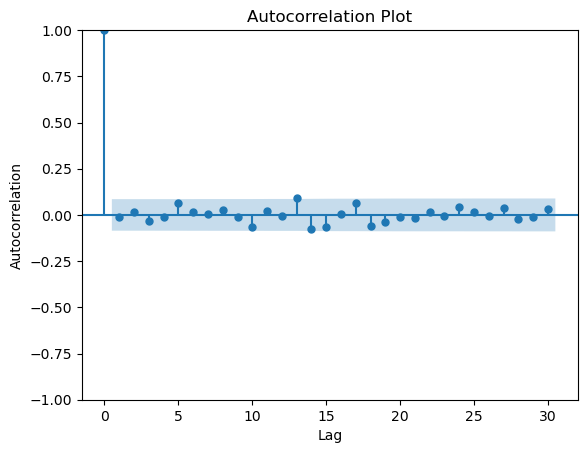

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Assuming 'time_series_data' is your time series data
# Plot autocorrelation
plot_acf(time_series_data, lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()


# Visual Inspection

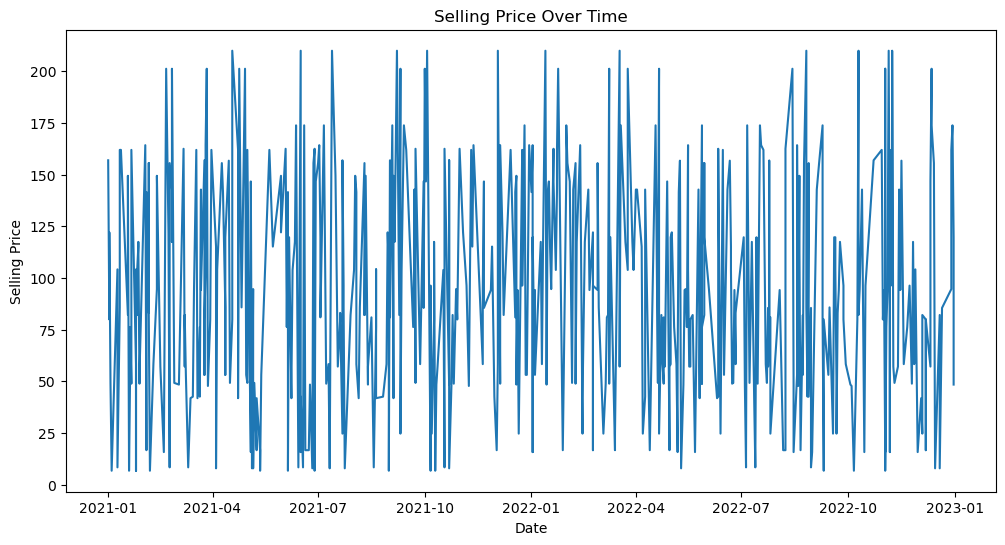

In [41]:
# Assuming the 'DATE' column is in the format (year, month, day, hour, datetime)
# Reset the index to have a regular DataFrame format
df.reset_index(inplace=True)

# Extract the datetime element from the tuple and convert it to datetime
df['DATE'] = pd.to_datetime(df['DATE'].apply(lambda x: x[-1]))

# Set the 'DATE' column as the index
df.set_index('DATE', inplace=True)

# Plotting the time series data with the 'SELLING PRICE' against the datetime index
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['SELLING PRICE'])
plt.title('Selling Price Over Time')
plt.xlabel('Date')
plt.ylabel('Selling Price')
plt.show()


In [37]:
print(df.columns)
print(df.head())


Index(['PRODUCT ID', 'QUANTITY', 'SALE TYPE', 'PAYMENT MODE', 'DISCOUNT %',
       'PRODUCT', 'CATEGORY', 'UOM', 'BUYING PRICE', 'SELLING PRICE',
       'rollMean', 'rollStd'],
      dtype='object')
                                  PRODUCT ID  QUANTITY     SALE TYPE  \
DATE                                                                   
(0, 0, 0, 0, 2021-01-01 00:00:00)      P0024         9    Wholesaler   
(1, 1, 1, 1, 2021-01-02 00:00:00)      P0038        15        Online   
(2, 2, 2, 2, 2021-01-02 00:00:00)      P0013         6  Direct Sales   
(3, 3, 3, 3, 2021-01-03 00:00:00)      P0004         5  Direct Sales   
(4, 4, 4, 4, 2021-01-04 00:00:00)      P0035        12        Online   

                                  PAYMENT MODE  DISCOUNT %    PRODUCT  \
DATE                                                                    
(0, 0, 0, 0, 2021-01-01 00:00:00)       Online           0  Product24   
(1, 1, 1, 1, 2021-01-02 00:00:00)         Cash           0  Product38   
(2, 

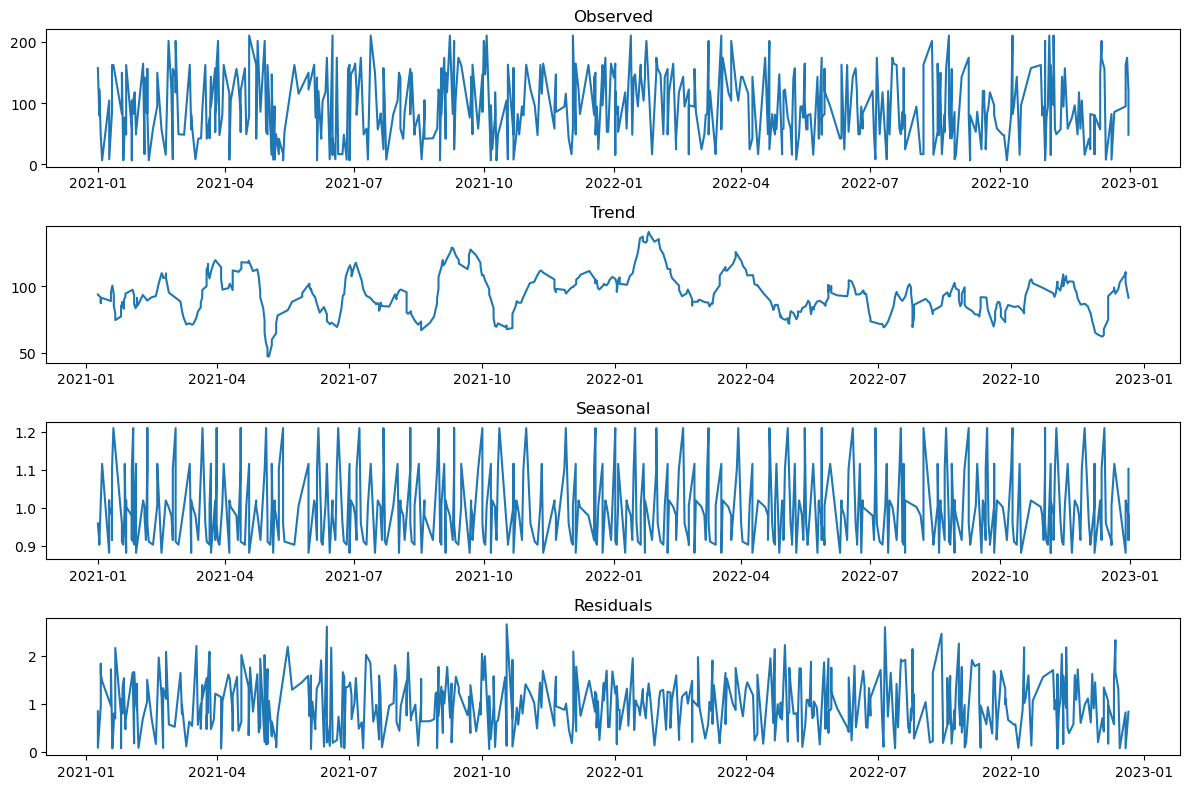

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
result = seasonal_decompose(df['SELLING PRICE'], model='multiplicative', period=12)  # Adjust period as needed

# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(result.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(result.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(result.resid)
plt.title('Residuals')

plt.tight_layout()
plt.show()


In [43]:
# Perform seasonal decomposition
result = seasonal_decompose(df['SELLING PRICE'], model='multiplicative', period=12)  # Adjust period as needed

# Print the values for each component
print("Observed:")
print(result.observed.head())

print("\nTrend:")
print(result.trend.head())

print("\nSeasonal:")
print(result.seasonal.head())

print("\nResiduals:")
print(result.resid.head())


Observed:
DATE
2021-01-01    156.96
2021-01-02     79.92
2021-01-02    122.08
2021-01-03     48.84
2021-01-04      6.70
Name: SELLING PRICE, dtype: float64

Trend:
DATE
2021-01-01   NaN
2021-01-02   NaN
2021-01-02   NaN
2021-01-03   NaN
2021-01-04   NaN
Name: trend, dtype: float64

Seasonal:
DATE
2021-01-01    0.958412
2021-01-02    0.910508
2021-01-02    0.902230
2021-01-03    1.005494
2021-01-04    1.115425
Name: seasonal, dtype: float64

Residuals:
DATE
2021-01-01   NaN
2021-01-02   NaN
2021-01-02   NaN
2021-01-03   NaN
2021-01-04   NaN
Name: resid, dtype: float64


# Forecasting

In [56]:
import numpy as np
# Check for NaN values in test['SELLING PRICE'] and forecast_values
nan_check_test = test['SELLING PRICE'].isnull().sum()
nan_check_forecast = np.isnan(forecast_values).sum()

print(f"Number of NaN values in test set: {nan_check_test}")
print(f"Number of NaN values in forecast: {nan_check_forecast}")


Number of NaN values in test set: 70
Number of NaN values in forecast: 0


In [60]:
# Drop rows with missing values
test = test.dropna(subset=['SELLING PRICE'])


In [61]:
import numpy as np
# Check for NaN values in test['SELLING PRICE'] and forecast_values
nan_check_test = test['SELLING PRICE'].isnull().sum()
nan_check_forecast = np.isnan(forecast_values).sum()

print(f"Number of NaN values in test set: {nan_check_test}")
print(f"Number of NaN values in forecast: {nan_check_forecast}")

Number of NaN values in test set: 0
Number of NaN values in forecast: 0


In [63]:
nan_check_forecast = np.isnan(forecast_values).sum()
nan_check_test = test['SELLING PRICE'].isnull().sum()

print(f"Number of NaN values in forecast: {nan_check_forecast}")
print(f"Number of NaN values in test set: {nan_check_test}")


Number of NaN values in forecast: 0
Number of NaN values in test set: 70


In [66]:
# Create a copy of the 'test' DataFrame
test_copy = test.copy()

# Fill NaN values in the 'SELLING PRICE' column of the copied DataFrame with the mean
test_copy['SELLING PRICE'].fillna(test_copy['SELLING PRICE'].mean(), inplace=True)


In [67]:
nan_check_forecast = np.isnan(forecast_values).sum()
nan_check_test = test['SELLING PRICE'].isnull().sum()

print(f"Number of NaN values in forecast: {nan_check_forecast}")
print(f"Number of NaN values in test set: {nan_check_test}")


Number of NaN values in forecast: 0
Number of NaN values in test set: 0


In [68]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)  # 80% train, 20% test
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA model
model = ARIMA(train['SELLING PRICE'], order=(5, 1, 0))  # Example order, tune as needed
fitted_model = model.fit()

# Forecast
forecast_values = fitted_model.forecast(steps=len(test))

# Evaluate the forecast (for example, using RMSE)
mse = mean_squared_error(test['SELLING PRICE'], forecast_values)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 52.78213863179871


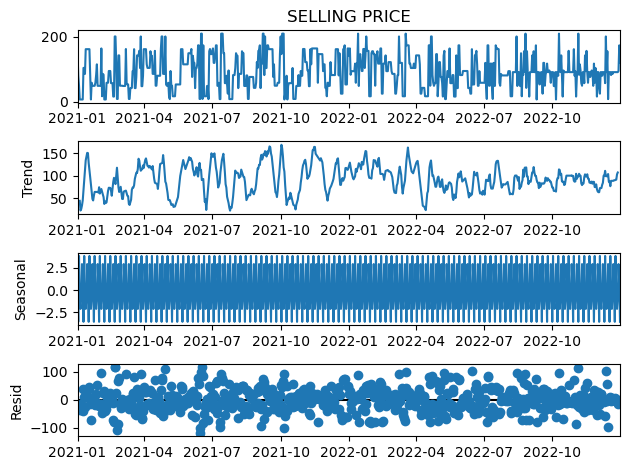

In [71]:
# Forward fill missing values in the 'SELLING PRICE' column
df['SELLING PRICE'].fillna(method='ffill', inplace=True)

# Decompose the time series into trend, seasonality, and residuals
result = seasonal_decompose(df['SELLING PRICE'], model='additive')

# Visualize the decomposition
result.plot()
plt.show()


In [74]:
print(df.columns)
print(df.head())


Index(['level_0', 'index', 'PRODUCT ID', 'QUANTITY', 'SALE TYPE',
       'PAYMENT MODE', 'DISCOUNT %', 'PRODUCT', 'CATEGORY', 'UOM',
       'BUYING PRICE', 'SELLING PRICE', 'rollMean', 'rollStd'],
      dtype='object')
            level_0  index PRODUCT ID  QUANTITY     SALE TYPE PAYMENT MODE  \
2021-01-01      0.0    0.0      P0024       9.0    Wholesaler       Online   
2021-01-02      1.0    1.0      P0038      15.0        Online         Cash   
2021-01-03      3.0    3.0      P0004       5.0  Direct Sales       Online   
2021-01-04      4.0    4.0      P0035      12.0        Online       Online   
2021-01-05      NaN    NaN        NaN       NaN           NaN          NaN   

            DISCOUNT %    PRODUCT       CATEGORY  UOM  BUYING PRICE  \
2021-01-01         0.0  Product24           Dior   Ft         144.0   
2021-01-02         0.0  Product38      Valentino   Kg          72.0   
2021-01-03         0.0  Product04         Celine   Lt          44.0   
2021-01-04         0.0  Prod

In [75]:
# Replace 'Level_up' with 'DATE' if it indeed contains date-related information
df.rename(columns={'Level_up': 'DATE'}, inplace=True)


In [77]:
print(df.columns)


Index(['level_0', 'index', 'PRODUCT ID', 'QUANTITY', 'SALE TYPE',
       'PAYMENT MODE', 'DISCOUNT %', 'PRODUCT', 'CATEGORY', 'UOM',
       'BUYING PRICE', 'SELLING PRICE', 'rollMean', 'rollStd'],
      dtype='object')
